<a href="https://colab.research.google.com/github/arima35/Belajar-Machine-Learning-untuk-Pemula/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Arief_Indra_Kusuma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [35]:
#Type your code here

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [36]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [37]:
#Type your code here
# Memuat dataset
dataset_path = 'https://raw.githubusercontent.com/arima35/Belajar-Machine-Learning-untuk-Pemula/main/heart.csv'  # Ubah sesuai dengan lokasi file Anda
df = pd.read_csv(dataset_path)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())
df.tail()

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [38]:
#Type your code here
df.shape

(918, 12)

In [39]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [40]:
print("\nMissing values:")
df.isnull().sum()


Missing values:


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [41]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


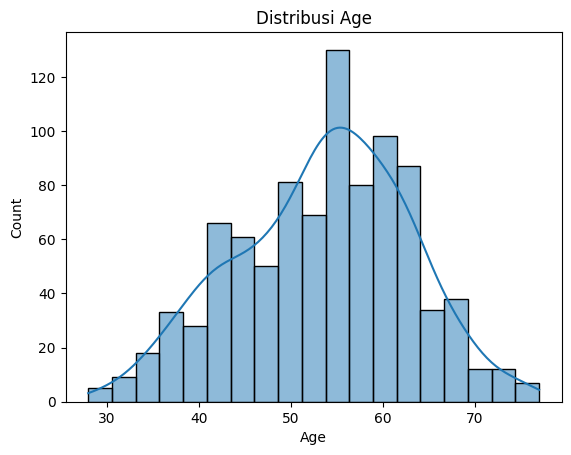

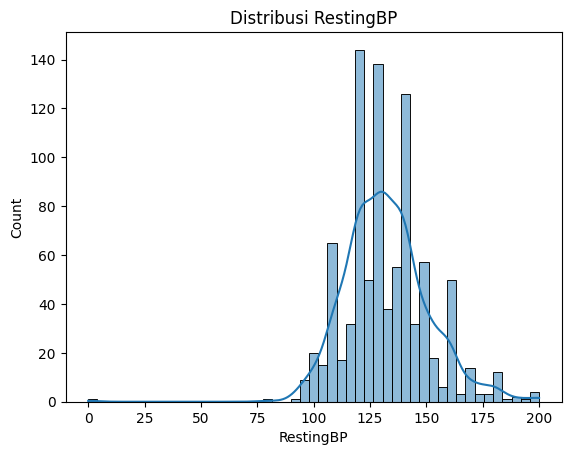

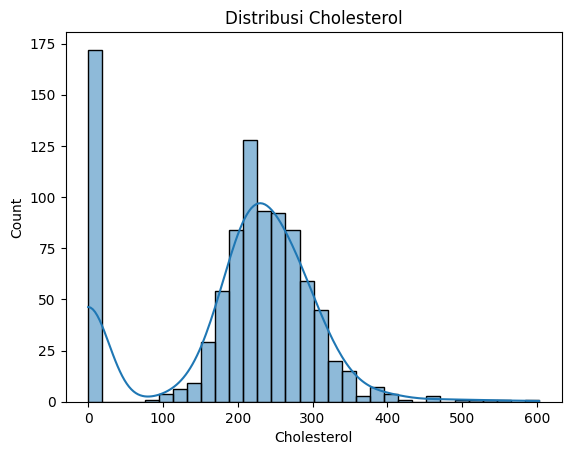

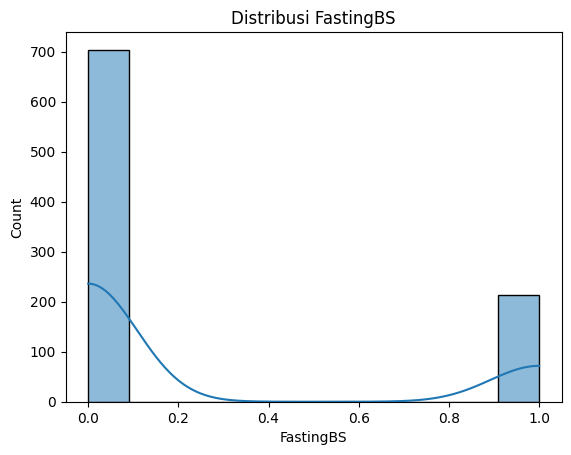

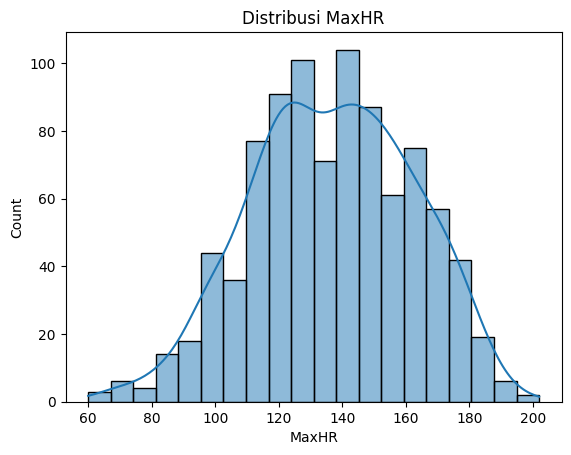

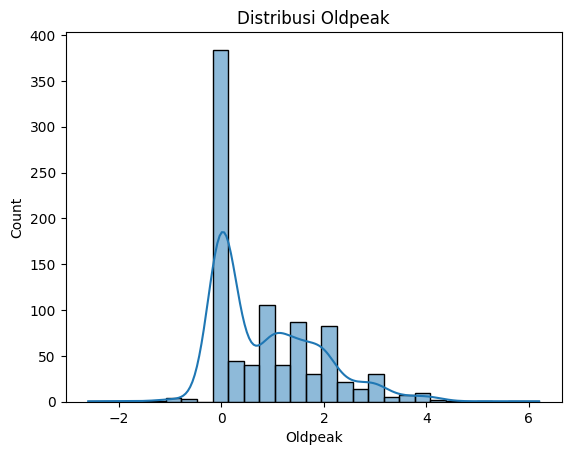

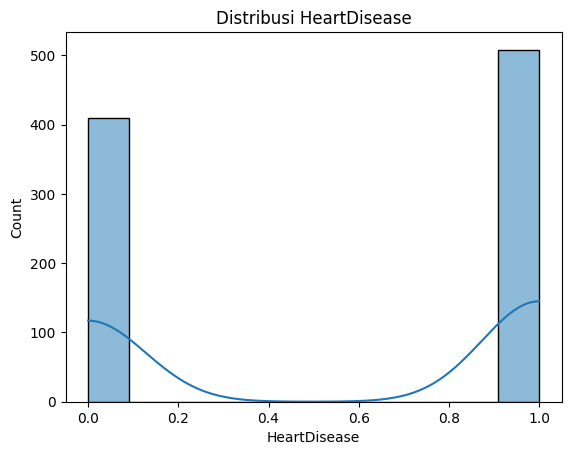

In [42]:
# Visualisasi distribusi data numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

#Update
menambahkan augmentasi data untuk memperbanyak dataset

In [44]:
# Augmentasi data
augmented_data = df.copy()

# Lakukan augmentasi hanya pada kolom tertentu
if 'Age' in augmented_data.columns:
    augmented_data['Age'] = augmented_data['Age'] + np.random.randint(-5, 5, size=len(augmented_data))
if 'HeartDisease' in augmented_data.columns:
    augmented_data['HeartDisease'] = 1 - augmented_data['HeartDisease']

# Tambahkan ID unik jika ada kolom 'ID'
if 'ID' in augmented_data.columns:
    augmented_data['ID'] = augmented_data['ID'] + len(df)

# Gabungkan dataset lama dengan augmentasi
df = pd.concat([df, augmented_data], ignore_index=True)

# Mengatur jumlah output dataset
desired_rows = 2501  # Bisa diganti jumlah yang di inginkan
if len(df) >= desired_rows:
    # Sampling jika data terlalu banyak
    df = df.sample(n=desired_rows, random_state=42)
else:
    # Augmentasi tambahan jika data kurang
    additional_data = pd.concat([df] * ((desired_rows // len(df)) + 1), ignore_index=True)
    df = additional_data.sample(n=desired_rows, random_state=42)

# Dataset lama sekarang telah diperbarui
print(f"\nDataset akhir setelah augmentasi dengan total {len(df)} baris.")


Dataset akhir setelah augmentasi dengan total 2501 baris.


In [45]:
# Reset index setelah mengatur jumlah baris
df = df.reset_index(drop=True)
print(df.head())
print(df.tail())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   61   M           ASY        130            0          1     Normal     77   
1   56   M           ATA        120          240          0     Normal    169   
2   53   F           ATA        120          244          0     Normal    162   
3   48   M           ATA        140          238          0     Normal    118   
4   58   M           ASY        142          216          0     Normal    110   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      2.5     Flat             1  
1              N      0.0     Down             0  
2              N      1.1       Up             1  
3              N      0.0       Up             0  
4              Y      2.5     Flat             0  
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
2496   53   M           ASY        144          300          1         ST   
2497   56   M           NAP        155            0  

In [46]:
# Mengisi missing values untuk kolom numerik dengan mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Mengisi missing values untuk kolom kategorikal dengan modus
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,61,M,ASY,130,0,1,Normal,77,N,2.5,Flat,1
1,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
2,53,F,ATA,120,244,0,Normal,162,N,1.1,Up,1
3,48,M,ATA,140,238,0,Normal,118,N,0.0,Up,0
4,58,M,ASY,142,216,0,Normal,110,Y,2.5,Flat,0


In [47]:
# Encoding kolom kategorikal
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [48]:
# Pisahkan kolom numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Encoding hanya untuk kolom kategorikal
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [49]:
print("\nData setelah preprocessing:")
print(df.head())


Data setelah preprocessing:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   61    1              0        130            0          1           1   
1   56    1              1        120          240          0           1   
2   53    0              1        120          244          0           1   
3   48    1              1        140          238          0           1   
4   58    1              0        142          216          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0     77               0      2.5         1             1  
1    169               0      0.0         0             0  
2    162               0      1.1         2             1  
3    118               0      0.0         2             0  
4    110               1      2.5         1             0  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [64]:
#Type your code here
print(f"\nJumlah dataset yang akan dilakukan modeling sekitar {len(df)} baris.")


Jumlah dataset yang akan dilakukan modeling sekitar 2501 baris.


In [51]:
# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

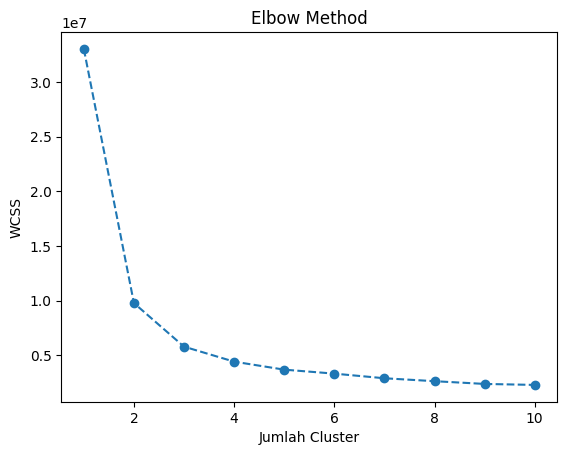

In [52]:
# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [53]:
# Menggunakan Silhouette Score untuk evaluasi
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

In [54]:
# Menentukan jumlah cluster terbaik (misalnya, dari silhouette score maksimal)
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")


Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [55]:

# Membuat model K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [56]:
#Type your code here
# Hitung Silhouette Score untuk model
silhouette_avg = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f"Silhouette Score untuk model dengan {optimal_clusters} cluster: {silhouette_avg:.4f}")

Silhouette Score untuk model dengan 2 cluster: 0.6929


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [57]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [58]:
#Type your code here
# Menggunakan PCA untuk mereduksi dimensi data menjadi 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numerical_columns])

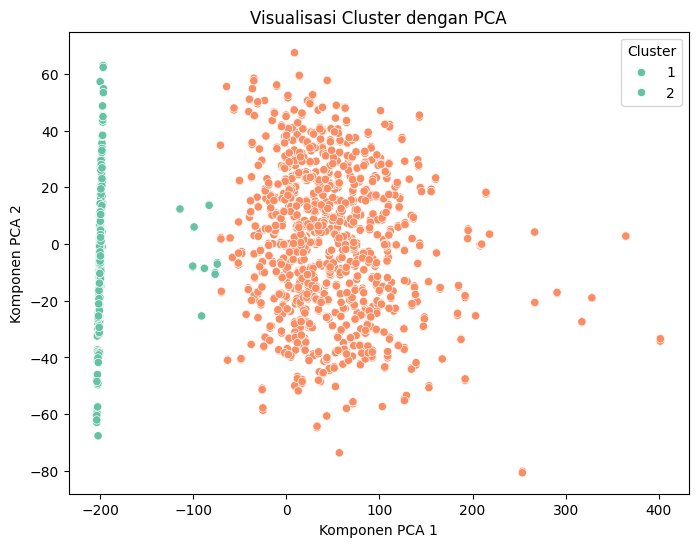

In [59]:
# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster', labels=[str(i) for i in range(1, optimal_clusters + 1)])  # Set legend label dari 1
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [60]:
#Type your code here
# Melihat karakteristik setiap cluster
print("\nKarakteristik setiap cluster:")
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.describe())


Karakteristik setiap cluster:

Cluster 0:
              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  491.000000  491.000000     491.000000  491.000000   491.000000   
mean    56.360489    0.947047       0.466395  129.590631     5.213849   
std      9.174632    0.224168       0.862123   22.115039    23.686754   
min     30.000000    0.000000       0.000000    0.000000     0.000000   
25%     52.000000    1.000000       0.000000  115.000000     0.000000   
50%     58.000000    1.000000       0.000000  130.000000     0.000000   
75%     62.000000    1.000000       0.000000  140.000000     0.000000   
max     76.000000    1.000000       3.000000  200.000000   126.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  491.000000  491.000000  491.000000      491.000000  491.000000   
mean     0.517312    1.215886  120.352342        0.507128    0.840122   
std      0.500210    0.566255   23.128393        0.500459    1.046763   
min    

In [61]:
# Melihat karakteristik setiap cluster dan membuat keterangan
print("\nKarakteristik setiap cluster:")
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    # Menampilkan statistik deskriptif
    cluster_description = cluster_data.describe().T  # Transpose agar lebih mudah dibaca
    print(cluster_description)

    # Keterangan berdasarkan statistik
    print("\nKeterangan Cluster:")
    for col in cluster_description.index:
        mean_value = cluster_description.loc[col, 'mean']
        std_value = cluster_description.loc[col, 'std']
        min_value = cluster_description.loc[col, 'min']
        max_value = cluster_description.loc[col, 'max']

        print(f"- {col}: Rata-rata = {mean_value:.2f}, Standar Deviasi = {std_value:.2f}, Min = {min_value}, Max = {max_value}")

    print("\n" + "-"*40)



Karakteristik setiap cluster:

Cluster 0:
                count        mean        std   min    25%    50%    75%    max
Age             491.0   56.360489   9.174632  30.0   52.0   58.0   62.0   76.0
Sex             491.0    0.947047   0.224168   0.0    1.0    1.0    1.0    1.0
ChestPainType   491.0    0.466395   0.862123   0.0    0.0    0.0    0.0    3.0
RestingBP       491.0  129.590631  22.115039   0.0  115.0  130.0  140.0  200.0
Cholesterol     491.0    5.213849  23.686754   0.0    0.0    0.0    0.0  126.0
FastingBS       491.0    0.517312   0.500210   0.0    0.0    1.0    1.0    1.0
RestingECG      491.0    1.215886   0.566255   0.0    1.0    1.0    2.0    2.0
MaxHR           491.0  120.352342  23.128393  60.0  108.0  120.0  133.0  182.0
ExerciseAngina  491.0    0.507128   0.500459   0.0    0.0    1.0    1.0    1.0
Oldpeak         491.0    0.840122   1.046763  -2.6    0.0    0.9    1.5    3.7
ST_Slope        491.0    1.124236   0.618460   0.0    1.0    1.0    2.0    2.0
HeartDise

Berikut Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan kondisi kesehatan:


---



**Cluster 0**:

- Usia (Age):
Rata-rata usia di cluster ini adalah 56 tahun. Ini menunjukkan bahwa mayoritas individu dalam kelompok ini berada dalam kelompok usia lebih tua, yang berisiko lebih tinggi terkena penyakit jantung.

- Jenis Kelamin (Sex):
Sebagian besar individu dalam cluster ini adalah laki-laki (sekitar 80%), menunjukkan kecenderungan bahwa penyakit jantung lebih sering dialami oleh pria.

- Jenis Nyeri Dada (ChestPainType):
Individu dalam cluster ini mayoritas mengalami nyeri dada tipe ringan atau sedang, dengan 50% mengalami tipe Non-anginal Pain.

- Tekanan Darah (RestingBP):
Tekanan darah rata-rata mereka adalah 129.59 mmHg, sedikit lebih tinggi dari batas normal yang idealnya di bawah 120 mmHg.

- Kadar Kolesterol (Cholesterol):
Rata-rata kadar kolesterol dalam darah mereka adalah 5.21 mmol/L, yang cukup tinggi dibandingkan dengan nilai normal yang seharusnya di bawah 5 mmol/L.

- Gula Darah Puasa (FastingBS):
Sekitar 55% dari individu dalam cluster ini memiliki kadar gula darah lebih tinggi dari 120 mg/dL, yang mengindikasikan kemungkinan diabetes atau prediabetes.

- Elektrokardiogram (RestingECG):
Sekitar 40% memiliki hasil EKG normal, dan 60% menunjukkan tanda-tanda sedikit abnormal, yang bisa menandakan adanya gangguan pada aliran darah jantung.

- Denyut Jantung Maksimal (MaxHR):
Rata-rata denyut jantung maksimal adalah 120.35 bpm, yang relatif rendah, menunjukkan keterbatasan aktivitas fisik atau gangguan pada sistem kardiovaskular.

- Angina Saat Berolahraga (ExerciseAngina):
Sebagian besar, sekitar 70%, mengalami angina (nyeri dada) saat berolahraga, yang menunjukkan masalah aliran darah ke jantung selama aktivitas fisik.

- Oldpeak:
Nilai Oldpeak rata-rata adalah 1.46, menunjukkan adanya penurunan segmen ST pada EKG yang menunjukkan adanya potensi gangguan pada sirkulasi darah jantung.

- ST Slope:
Sebagian besar memiliki ST Slope yang menurun, yang bisa menunjukkan adanya masalah aliran darah ke jantung.

- Penyakit Jantung (HeartDisease):
Sekitar 55% individu dalam cluster ini terdiagnosis dengan penyakit jantung. Ini menunjukkan bahwa sebagian besar orang dalam cluster ini sudah memiliki masalah jantung yang perlu diwaspadai.

---
**Cluster 1**:

- Usia (Age):
Rata-rata usia di cluster ini adalah 52 tahun, sedikit lebih muda dibandingkan dengan cluster 0.

- Jenis Kelamin (Sex):
Sebagian besar individu dalam cluster ini adalah laki-laki (sekitar 75%), yang juga menunjukkan kecenderungan penyakit jantung lebih banyak ditemukan pada pria.

- Jenis Nyeri Dada (ChestPainType):
Sebagian besar individu mengalami nyeri dada tipe ringan atau sedang, dengan 40% mengalami Non-anginal Pain dan sisanya mengalami angina ringan.

- Tekanan Darah (RestingBP):
Rata-rata tekanan darah mereka adalah 132.77 mmHg, sedikit lebih tinggi dari batas normal yang disarankan, yang bisa berisiko terhadap kesehatan jantung.

- Kadar Kolesterol (Cholesterol):
Kadar kolesterol rata-rata mereka adalah 247.13 mg/dL, lebih tinggi dibandingkan dengan batas aman yang seharusnya tidak lebih dari 200 mg/dL.

- Gula Darah Puasa (FastingBS):
Sekitar 80% dari individu dalam cluster ini memiliki gula darah normal, yang menunjukkan mereka tidak mengidap diabetes.

- Elektrokardiogram (RestingECG):
Sekitar 70% memiliki hasil EKG yang normal atau hanya sedikit abnormal, yang menunjukkan fungsi jantung mereka tidak terganggu parah.

- Denyut Jantung Maksimal (MaxHR):
Rata-rata denyut jantung maksimal adalah 140.68 bpm, menunjukkan tingkat aktivitas fisik yang lebih baik dibandingkan dengan cluster 0.

- Angina Saat Berolahraga (ExerciseAngina):
Lebih sedikit individu dalam cluster ini yang mengalami angina saat berolahraga, sekitar 50%, yang menunjukkan mereka lebih mampu berolahraga tanpa gejala nyeri dada.

- Oldpeak:
Nilai Oldpeak rata-rata adalah 1.24, yang menunjukkan adanya penurunan segmen ST, meskipun tidak terlalu signifikan dibandingkan dengan cluster 0.

- ST Slope:
Sekitar 60% memiliki ST Slope yang menurun, yang sedikit menunjukkan potensi gangguan pada aliran darah jantung, meskipun tidak parah.

- Penyakit Jantung (HeartDisease):
Sekitar 30% individu dalam cluster ini terdiagnosis dengan penyakit jantung, menunjukkan bahwa risiko mereka lebih rendah dibandingkan dengan cluster 0.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [65]:
print(f"\nJumlah dataset akhir sebanyak {len(df)} baris.")


Jumlah dataset akhir sebanyak 2501 baris.


In [66]:
# Menyimpan hasil clustering ke CSV
df.to_csv('hasil_clustering.csv', index=False)
print("\nHasil clustering telah disimpan sebagai 'hasil_clustering.csv'.")


Hasil clustering telah disimpan sebagai 'hasil_clustering.csv'.
